#

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
exit()
!conda --version
import torch
torch.__version__

RuntimeError: This module must ONLY run as part of a Colab notebook!

In [2]:
!pip uninstall torch -y
!conda install -c conda-forge pymatgen rdkit openbabel -y
!pip install torch==1.13.1+cu117 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-1.13.0+cu117.html
!pip install torch_geometric
exit()
!pip install torchmetrics tqdm transformers wandb apex curtsies fairscale imageio joblib Pillow pytorch_lightning PyYAML ray scikit-learn ipykernel
!pip install git+https://github.com/tensorflow/docs
exit()

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pymatgen
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |     pyhd8ed1ab_0         296 KB  conda-forge
    boost-1.78.0               |  py310hc4a4660_4         354 KB  conda-forge
    boost-cpp-1.78.0           |       h6582d0a_3        15.2 MB  conda-forge
    brotli-1.0.9               |       h166bdaf_8          18 KB  conda-forge
    brotli-bin-1.0.9           |       h166bdaf_8          20 KB  conda-for

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 29.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.6/720.6 kB 49.0 MB

In [1]:
!git clone https://github.com/hyunp2/ghp_mof.git

Cloning into 'ghp_mof'...
remote: Enumerating objects: 758, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 758 (delta 135), reused 158 (delta 83), pack-reused 513
Receiving objects: 100% (758/758), 52.69 MiB | 22.79 MiB/s, done.
Resolving deltas: 100% (391/391), done.


In [7]:
%%bash
cd ghp_mof && git pull && python -m main \
--which_mode infer \
--backbone cgcnn \
--load_ckpt_path models \
--name cgcnn_pub_hmof_0.1 \
--gpu \
--train_frac 1 \
--data_dir_crystal cif_files \
--ensemble_names cgcnn_pub_hmof_0.1 cgcnn_pub_hmof_0.1_dgx cgcnn_pub_hmof_0.1_v2

Already up to date.
Truncate_above is False...
0-th core is parsed!
Root dir chosen is cif_files
Truncate_above is False...
mean None std None
Loaded a model from rank 0!
Loaded a model from rank 0!
Loaded a model from rank 0!
Property is predicted and saved as ensemble_property_prediction.csv ...


In [6]:
import pandas as pd
pd.read_csv("ghp_mof/publication_figures/ensemble_property_prediction.csv", index_col=0)

name      pred       std      real
0  hMOF-0.cif  0.208279  0.009849  0.225851
1  hMOF-2.cif  1.058071  0.309410  0.854371
2  hMOF-1.cif  1.703976  0.242663  1.806490

In [12]:
!cd ghp_mof/DiffLinker && git pull && python -W ignore difflinker_sample_and_analyze.py \
--fragments geom/datasets/geom_multifrag_test_frag.sdf \
--model checkpoints/geom_difflinker.ckpt \
--linker_size checkpoints/geom_size_gnn.ckpt \
--output geom/output \
--samples_dir geom/samples

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.7/798.7 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.9/426.9 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

Lightning automatically upgraded your loaded checkpoint from v1.6.3 to v2.0.3. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file checkpoints/geom_size_gnn.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.6.3 to v2.0.3. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file checkpoints/geom_difflinker.ckpt`
100%|██████████| 1/1 [02:38<00:00, 158.56s/it]


ghp_mof/DiffLinker/geom/samples/mol_4/output.gif



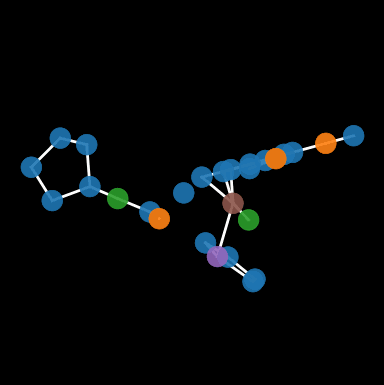

ghp_mof/DiffLinker/geom/output/output_4_geom_multifrag_test_frag_.xyz


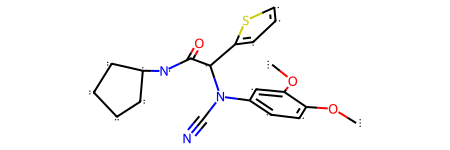



ghp_mof/DiffLinker/geom/samples/mol_2/output.gif



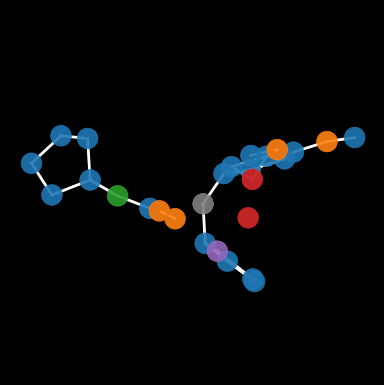

ghp_mof/DiffLinker/geom/output/output_2_geom_multifrag_test_frag_.xyz


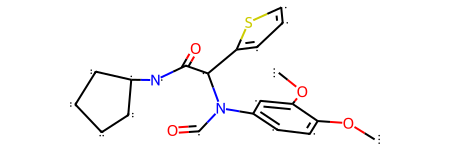



ghp_mof/DiffLinker/geom/samples/mol_0/output.gif



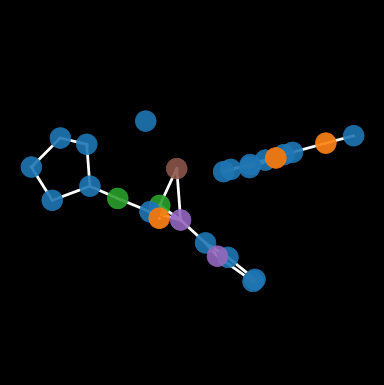

ghp_mof/DiffLinker/geom/output/output_0_geom_multifrag_test_frag_.xyz


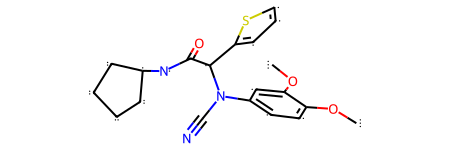



ghp_mof/DiffLinker/geom/samples/mol_1/output.gif



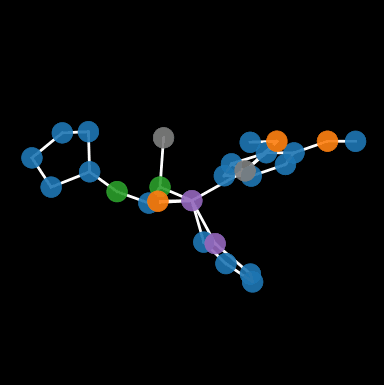

ghp_mof/DiffLinker/geom/output/output_1_geom_multifrag_test_frag_.xyz


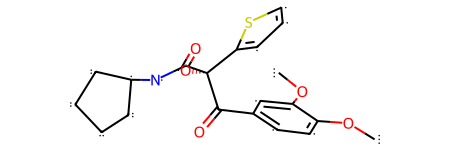



ghp_mof/DiffLinker/geom/samples/mol_3/output.gif



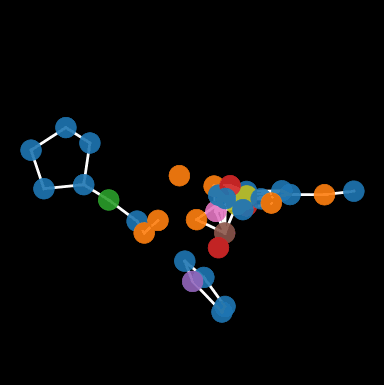

ghp_mof/DiffLinker/geom/output/output_3_geom_multifrag_test_frag_.xyz


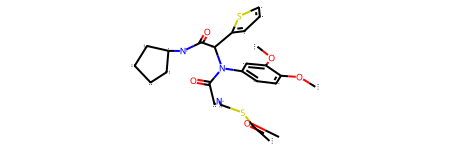

In [63]:
import os, base64, tempfile
from openbabel.pybel import readfile
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

workdir = "ghp_mof/DiffLinker"
samples_dir = os.path.join(workdir, "geom/samples")
output_dir = os.path.join(workdir, "geom/output")
mol_ids = [int(x.replace("mol_", "")) for x in os.listdir(samples_dir) if os.path.isdir(os.path.join(samples_dir, x))]
for mol_id in mol_ids:
    mol = "mol_" + str(mol_id)
    gif_path = os.path.join(samples_dir, mol, "output.gif")
    print(gif_path)
    b64 = base64.b64encode(open(gif_path,'rb').read()).decode('ascii')
    display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))

    xyz = "output_" + str(mol_id) + "_geom_multifrag_test_frag_.xyz"
    print(os.path.join(output_dir, xyz))
    mol = list(readfile("xyz", os.path.join(output_dir, xyz)))[-1]

    mol.write("sdf", "tmp.sdf", overwrite=True)
    rdmol = next(iter(Chem.SDMolSupplier("tmp.sdf")))
    display(rdmol)
    if os.path.exists("tmp.sdf"):
        os.remove("tmp.sdf")
    print("\n")